# Source Light Plot (Figure 4)

/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:67: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:1111: RuntimeWarning: divide by zero encountered in log10
  np.log10(model),
/Users/rbrady0110/micromamba/envs/doubles/lib/python3.13/site-packages/lenstronomy/Plots/model_band_plot.py:1168: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data - model),


-1.0591361002463537 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0591361002463542
-1.086411440801818 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0864114408018188
-1.0196060273704444 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0196060273704435


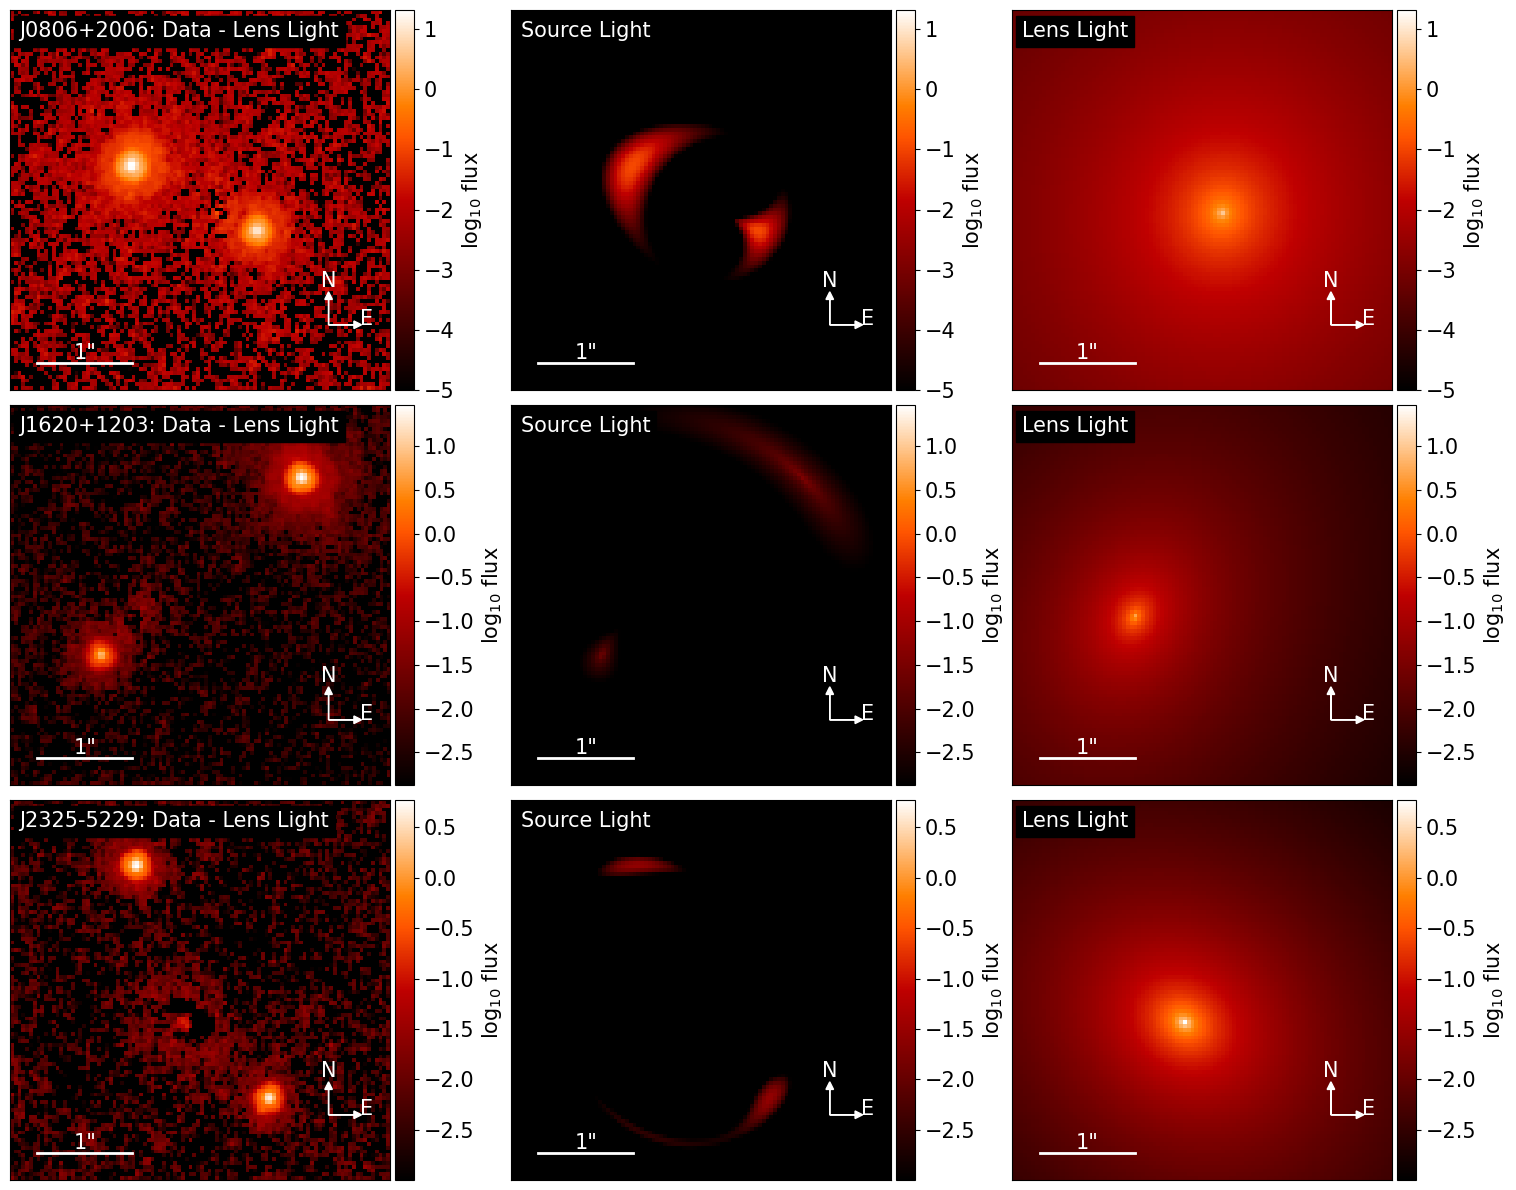

In [3]:
import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system names
names = ['J0806+2006', 'J1620+1203', 'J2325-5229'] 
filter = 'F814W'
fontsize = 20

nrows = len(names)
fig, axes = plt.subplots(nrows, 3, figsize=(15.5, 12))

for i, name in enumerate(names):
    filename = f"../../cutout_data/{name}/{filter}/{name}_{filter}.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    # ynitialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat")

    # generate separate component plots
    modelPlot.decomposition_plot(
            ax=axes[i, 1], text="Source Light", source_add=True, unconvolved=True
        )    
    modelPlot.decomposition_plot(
            ax=axes[i, 2], text="Lens Light", lens_light_add=True, unconvolved=True
        )    
    modelPlot.subtract_from_data_plot(
            ax=axes[i, 0], text=f"{name}: Data - Lens Light", lens_light_add=True
        )
    
plt.tight_layout()
plt.show()
